## Animated sinuisoidal Müller-Lyer illusion
This is a variant of Gianni Sarcone's (@gsarcone) illusion, which is itself a variant of the original Müller-Lyer illusion

https://twitter.com/Chris_Said/status/1213217943414136833

The `make_animation` function will create some .png files that you can stitch together into an animated gif with ImageMagick
```
convert -delay 7 -loop 0 frame*.png  animation.gif
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from os import system

In [18]:
blue = np.array([58., 195., 242.]) / 255
pink = np.array([237., 38., 133.]) / 255
gray = np.array([150, 150, 150]) / 255

In [92]:
def periodic(x, periods, phase, max_x, amp=1):
    return amp * np.sin(2 * periods * np.pi * (x - phase) / max_x)

In [98]:
def plot_vertex(x, y, w, y_delta):
    plt.plot([x, x + w/3], [y, y + y_delta], color=gray, linewidth=1)
    plt.plot([x - w/3, x], [y + y_delta, y], color=gray, linewidth=1)

In [154]:
def make_plot(i,
             nrow=5,
             ncol=17,
             w=1,
             h=3,
             periods=2,
             despine=True,
             expanding=False):

    max_x = ncol * w
    for col in range(ncol):
        for row in range(nrow):
            x = col * w
            if row % 2 == 0:
                color = blue
            else:
                color = pink
            plt.plot([x, x], [row * h, row * h + h], color=color)
            y_delta = periodic(x, periods, max_x=max_x, phase=i)
            if expanding and row % 2 == 0:
                y_delta = -y_delta
            plot_vertex(x=x, y=row*h, w=w, y_delta=y_delta)
            if row == nrow-1:
                plot_vertex(x=x, y=(row+1)*h, w=w, y_delta=y_delta)
                
    if despine:
        sns.despine(left=True, bottom=True)
    plt.xticks([])
    plt.yticks([])
    plt.text(-w/2, -1.2*h, 'None of the colored lines are moving. \nCreated by @Chris_Said, modified from @gsarcone')

In [160]:
def make_animation(nrow=5,
                   ncol=17,
                   w=1,
                   h=3,
                   periods=2,
                   despine=True,
                   expanding=False):
    plt.figure()

    for i in range(ncol):
        plt.gca().clear()
        make_plot(i, nrow=nrow, ncol=ncol, w=w, h=h, periods=periods, despine=despine, expanding=expanding)
        plt.savefig(f'{directory}/frame_{i:02d}.png', dpi=150)

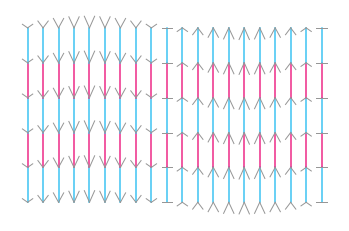

In [111]:
directory = 'frames_ncol20_periods1'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=20, periods=1)

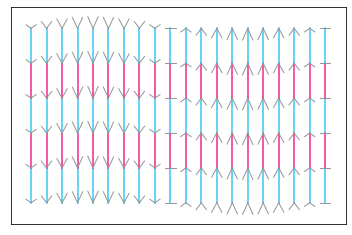

In [118]:
directory = 'frames_ncol20_periods1_with_spine'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=20, periods=1, despine=False)

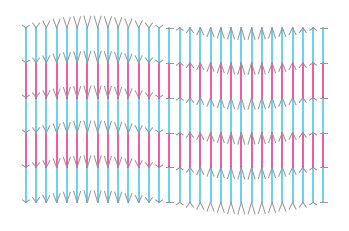

In [120]:
directory = 'frames_ncol30_periods1'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=1)

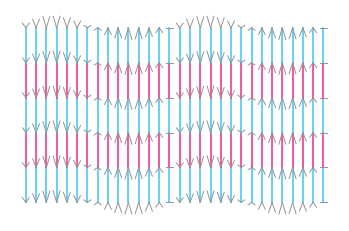

In [121]:
directory = 'frames_ncol30_periods2'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=2)

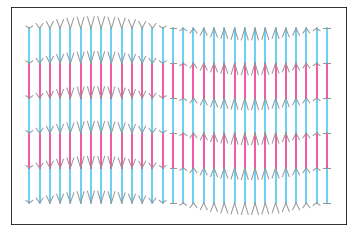

In [122]:
directory = 'frames_ncol30_periods1_with_spine'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=1, despine=False)

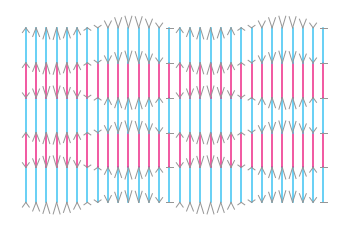

In [130]:
directory = 'frames_ncol30_periods2_expanding'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=2, expanding=True)

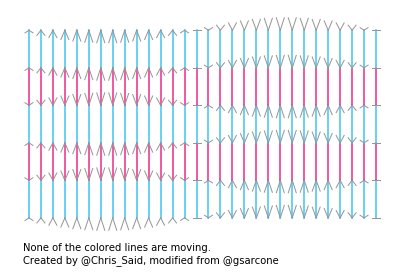

In [159]:
directory = 'frames_ncol30_periods1_expanding'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=1, expanding=True)

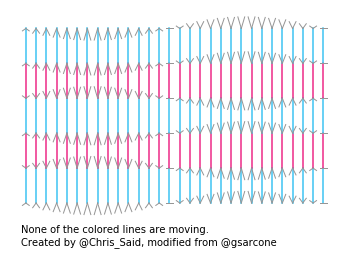

In [161]:
directory = 'frames_ncol30_periods1_expanding_big'
system(f'rm -rf {directory}')
system(f'mkdir {directory}')
make_animation(ncol=30, periods=1, expanding=True)